In [691]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [692]:
data_2017 = os.path.join("Resources", "2017.csv")
cost_of_living = os.path.join("Resources", "cost_of_living.csv")
physician_data = os.path.join("Resources", "physician_data.csv")
nurse_data = os.path.join("Resources", "nurse_data.csv")
PA_data = os.path.join("Resources", "PA_data.csv")

In [693]:
data_2017 = pd.read_csv(data_2017)
cost_of_living = pd.read_csv(cost_of_living)
physician_data = pd.read_csv(physician_data)
nurse_data = pd.read_csv(nurse_data)
PA_data = pd.read_csv(PA_data)

In [694]:
PA_data.head()

,Location,Total
0,United States,88604.0
1,Alabama,535.0
2,Alaska,346.0
3,Arizona,1940.0
4,Arkansas,209.0


In [695]:
pa_data = PA_data.rename(columns={"Location": "State", "Total": "pa_total"})

In [696]:
pa_data.head()

,State,pa_total
0,United States,88604.0
1,Alabama,535.0
2,Alaska,346.0
3,Arizona,1940.0
4,Arkansas,209.0


In [697]:
nurse_data.head()

,Location,Total
0,United States,165480.0
1,Alabama,2537.0
2,Alaska,480.0
3,Arizona,3403.0
4,Arkansas,1305.0


In [698]:
nurse_data = nurse_data.rename(columns={"Location": "State", "Total": "total_nurses"})

In [699]:
nurse_data.head()

,State,total_nurses
0,United States,165480.0
1,Alabama,2537.0
2,Alaska,480.0
3,Arizona,3403.0
4,Arkansas,1305.0


In [700]:
physician_data = physician_data.rename(columns={"Location":"State", "Primary Care Physicians": "primary_care_physicians", "Specialist Physicians": "specialist_physicians", "Total": "total"})

In [701]:
physician_data.head()

,State,primary_care_physicians,specialist_physicians,total
0,United States,479856.0,525439.0,1005295.0
1,Alabama,5863.0,6342.0,12205.0
2,Alaska,1054.0,846.0,1900.0
3,Arizona,8537.0,9269.0,17806.0
4,Arkansas,3513.0,3637.0,7150.0


In [702]:
cost_of_living.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1


In [703]:
us_state_abbrev = [{
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}]

In [704]:
us_state_abbrev = pd.DataFrame(us_state_abbrev).T

In [705]:
us_state_abbrev = us_state_abbrev.reset_index(level=0)

In [706]:
us_state_abbrev = us_state_abbrev.rename(columns={"index": "State"})

In [707]:
us_state_abbrev.head()

,State,0
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [708]:
cost_of_living = pd.merge(cost_of_living, us_state_abbrev, on="State")
physician_data = pd.merge(physician_data, us_state_abbrev, on="State" )
nurse_data = pd.merge(nurse_data, us_state_abbrev, on="State")
pa_data = pd.merge(pa_data, us_state_abbrev, on="State")

In [709]:
nurse_data.head()

,State,total_nurses,0
0,Alabama,2537.0,AL
1,Alaska,480.0,AK
2,Arizona,3403.0,AZ
3,Arkansas,1305.0,AR
4,California,15414.0,CA


In [710]:
pa_data = pa_data.rename(columns={0: "provider_state"})

In [711]:
pa_data.head()

,State,pa_total,provider_state
0,Alabama,535.0,AL
1,Alaska,346.0,AK
2,Arizona,1940.0,AZ
3,Arkansas,209.0,AR
4,California,7917.0,CA


In [712]:
nurse_data = nurse_data.rename(columns={0: "provider_state"})

In [713]:
nurse_data.head()

,State,total_nurses,provider_state
0,Alabama,2537.0,AL
1,Alaska,480.0,AK
2,Arizona,3403.0,AZ
3,Arkansas,1305.0,AR
4,California,15414.0,CA


In [714]:
physician_data = physician_data.rename(columns={0:"provider_state"})

In [715]:
cost_of_living = cost_of_living.rename(columns={0:"provider_state"})

In [716]:
cost_of_living.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,provider_state
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4,MS
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6,AR
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2,OK
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7,MO
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1,NM


In [717]:
data_2017.columns = data_2017.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [718]:
data_2017.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_hrr_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88


In [719]:
data_2017 = data_2017[["provider_state", "provider_name", "total_discharges", "average_covered_charges", "average_total_payments", "average_medicare_payments"]]

In [720]:
data_2017_raw = data_2017[["provider_state", "provider_name", "total_discharges", "average_covered_charges", "average_total_payments", "average_medicare_payments"]]

In [721]:
data_2017["average_consumer_payments"] = data_2017["average_total_payments"] - data_2017["average_medicare_payments"]

In [722]:
data_2017.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39,1766.32
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41,896.93
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36,3616.82
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00,980.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88,1804.59


In [723]:
state_grouped = data_2017.groupby("provider_state").sum()

In [724]:
state_grouped["per_capita_average_total_payments"] = state_grouped["average_total_payments"]/state_grouped["total_discharges"]
state_grouped["per capita average medicare payments"] = state_grouped["average_medicare_payments"]/state_grouped["total_discharges"]
state_grouped["per capita average consumer payments"] = state_grouped["average_consumer_payments"]/state_grouped["total_discharges"]

In [725]:
state_total_payments_grouped = state_grouped["per_capita_average_total_payments"].reset_index()

In [726]:
state_total_payments_grouped = state_total_payments_grouped.sort_values("per_capita_average_total_payments", ascending=False)

In [727]:
state_total_payments_grouped.head()

,provider_state,per_capita_average_total_payments
0,AK,742.757479
11,HI,629.444775
7,DC,569.416996
4,CA,527.639260
37,OR,526.075845


In [728]:
names = []
for name in state_total_payments_grouped["provider_state"]: 
    names.append(name)

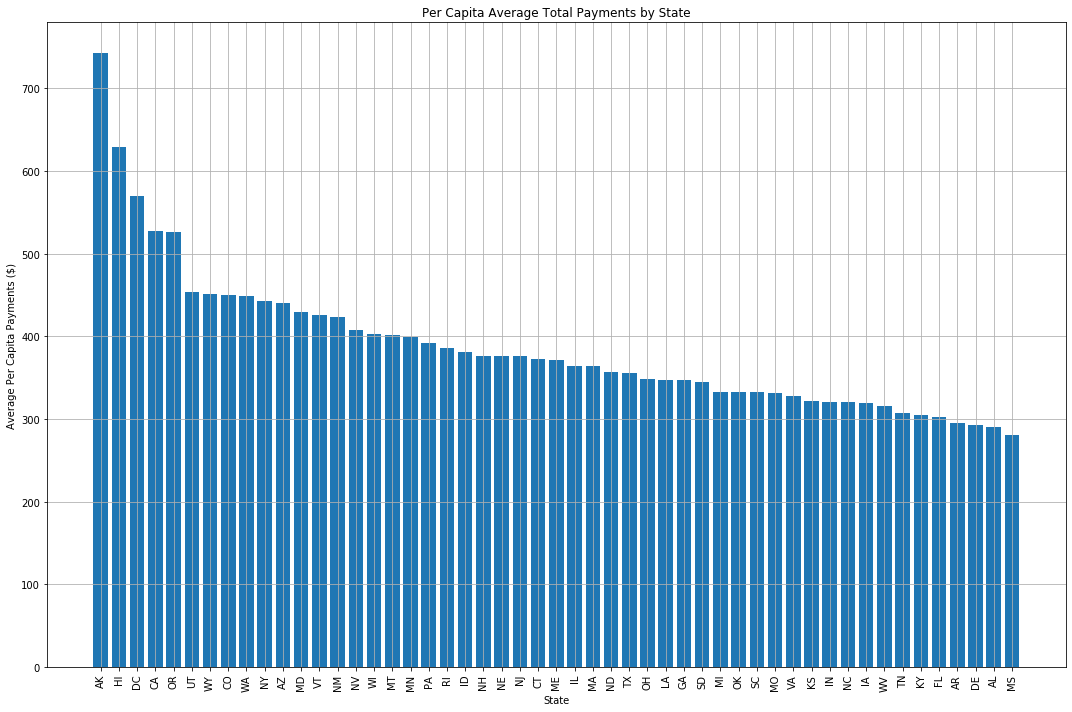

In [729]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_total_payments_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_total_payments_grouped["per_capita_average_total_payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Payments ($)")
plt.title("Per Capita Average Total Payments by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Total Payments by State")

In [730]:
comparison = pd.merge(state_total_payments_grouped, cost_of_living, on="provider_state")

In [731]:
comparison.head()

,provider_state,per_capita_average_total_payments,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,AK,742.757479,45,Alaska,129.9,134.2,133.9,154.2,130.8,150.9
1,HI,629.444775,51,Hawaii,192.9,169.3,318.6,172.7,148.6,116.8
2,DC,569.416996,50,District of Columbia,158.4,115.5,267.0,119.7,116.6,97.3
3,CA,527.639260,49,California,151.7,121.4,227.3,117.7,138.9,114.5
4,OR,526.075845,47,Oregon,134.2,110.3,181.8,88.0,136.7,113.2


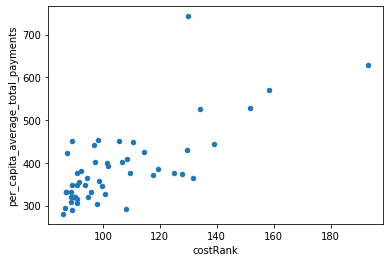

In [732]:
comparison.plot.scatter("costRank", "per_capita_average_total_payments")
# plt.savefig("Cost of Living vs Per Capita Average Total Payments")

In [733]:
x = comparison[["per_capita_average_total_payments", "costRank"]]

In [734]:
corr = x.corr()
corr

,per_capita_average_total_payments,costRank
per_capita_average_total_payments,1.000000,0.721119
costRank,0.721119,1.000000


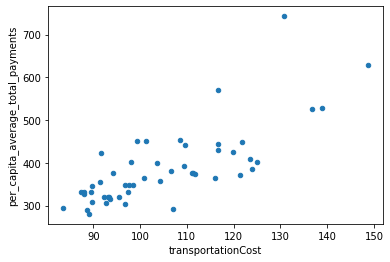

In [735]:
comparison.plot.scatter("transportationCost", "per_capita_average_total_payments")
# plt.savefig("Transportation Cost vs Per Capita Average Total Payments")

In [736]:
x = comparison[["per_capita_average_total_payments", "transportationCost"]]
corr = x.corr()
corr

,per_capita_average_total_payments,transportationCost
per_capita_average_total_payments,1.000000,0.759425
transportationCost,0.759425,1.000000


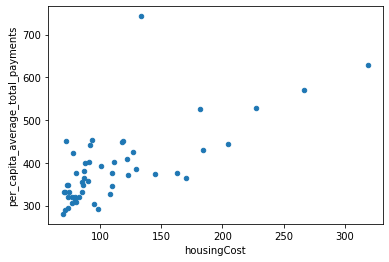

In [737]:
comparison.plot.scatter("housingCost", "per_capita_average_total_payments")
# plt.savefig("Housing Cost vs Per Capita Average Total Payments")

In [738]:
x = comparison[["per_capita_average_total_payments", "housingCost"]]
corr = x.corr()
corr

,per_capita_average_total_payments,housingCost
per_capita_average_total_payments,1.000000,0.683755
housingCost,0.683755,1.000000


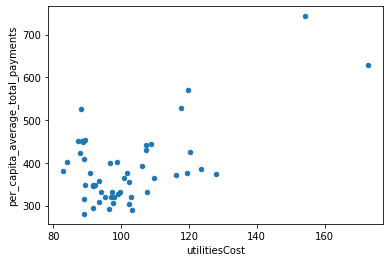

In [739]:
comparison.plot.scatter("utilitiesCost", "per_capita_average_total_payments")
# plt.savefig("Utilities Cost vs Per Capita Average Total Payments")

In [740]:
x = comparison[["per_capita_average_total_payments", "utilitiesCost"]]
corr = x.corr()
corr

,per_capita_average_total_payments,utilitiesCost
per_capita_average_total_payments,1.000000,0.592472
utilitiesCost,0.592472,1.000000


    *Observations:
    *Alaska, Hawaii, District of Columbia, California and Oregon pay most in per capita total health payments for sample group.
    *Mississippi, ALabama and Delware spend the lest per capita
    * Alaska(most:$742 spends $480 more than Mississippi (lest:$280))

In [741]:
state_medicare_grouped = state_grouped["per capita average medicare payments"].reset_index()

In [742]:
state_medicare_grouped = state_medicare_grouped.sort_values("per capita average medicare payments", ascending=False)

In [743]:
state_medicare_grouped.head()

,provider_state,per capita average medicare payments
0,AK,650.470138
11,HI,495.098695
4,CA,464.321545
37,OR,452.760314
7,DC,435.275106


In [744]:
names = []
for name in state_medicare_grouped["provider_state"]: 
    names.append(name)

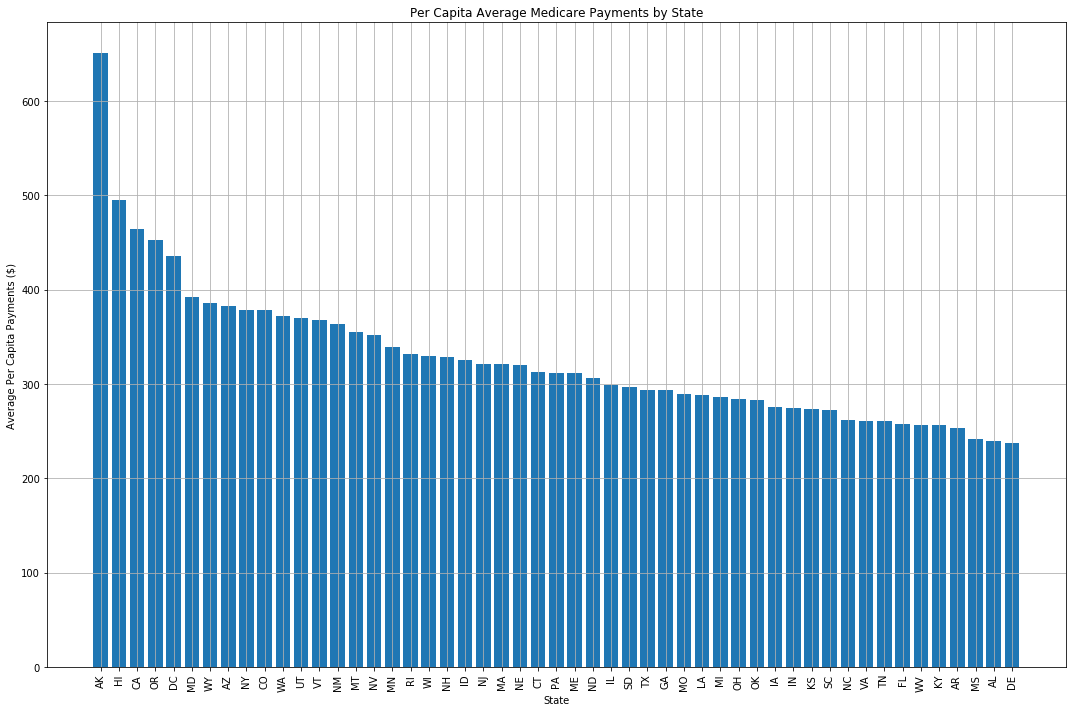

In [745]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_medicare_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_medicare_grouped["per capita average medicare payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Payments ($)")
plt.title("Per Capita Average Medicare Payments by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Medicare Payments by State")

In [746]:
state_consumer_payment_grouped = state_grouped["per capita average consumer payments"].reset_index()

In [747]:
state_consumer_payment_grouped = state_consumer_payment_grouped.sort_values("per capita average consumer payments", ascending=False)

In [748]:
state_consumer_payment_grouped.head()

,provider_state,per capita average consumer payments
11,HI,134.346081
7,DC,134.141889
0,AK,92.287341
44,UT,83.676189
38,PA,80.520042


In [749]:
names = []
for name in state_consumer_payment_grouped["provider_state"]: 
    names.append(name)

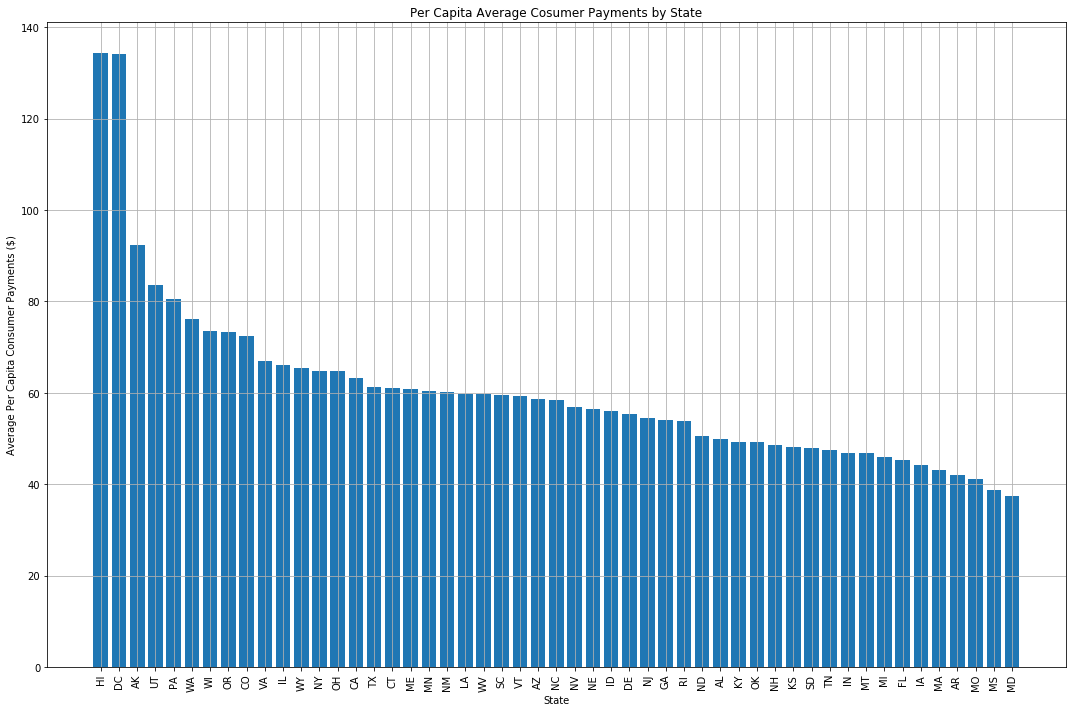

In [750]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_consumer_payment_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_consumer_payment_grouped["per capita average consumer payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Consumer Payments ($)")
plt.title("Per Capita Average Cosumer Payments by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Consumer Payments by State")

In [751]:
average_covered_charges = data_2017.groupby("provider_state").sum()

In [752]:
average_covered_charges["per capita average covered charges"] = average_covered_charges["average_covered_charges"]/average_covered_charges["total_discharges"] 

In [753]:
average_covered_charges = average_covered_charges["per capita average covered charges"].reset_index()

In [754]:
average_covered_charges = average_covered_charges.sort_values("per capita average covered charges", ascending=False)

In [755]:
average_covered_charges.head()

,provider_state,per capita average covered charges
4,CA,3048.361998
0,AK,3043.830371
33,NV,2838.785136
5,CO,2459.717892
31,NJ,2288.516268


In [756]:
names = []
for name in average_covered_charges["provider_state"]: 
    names.append(name)

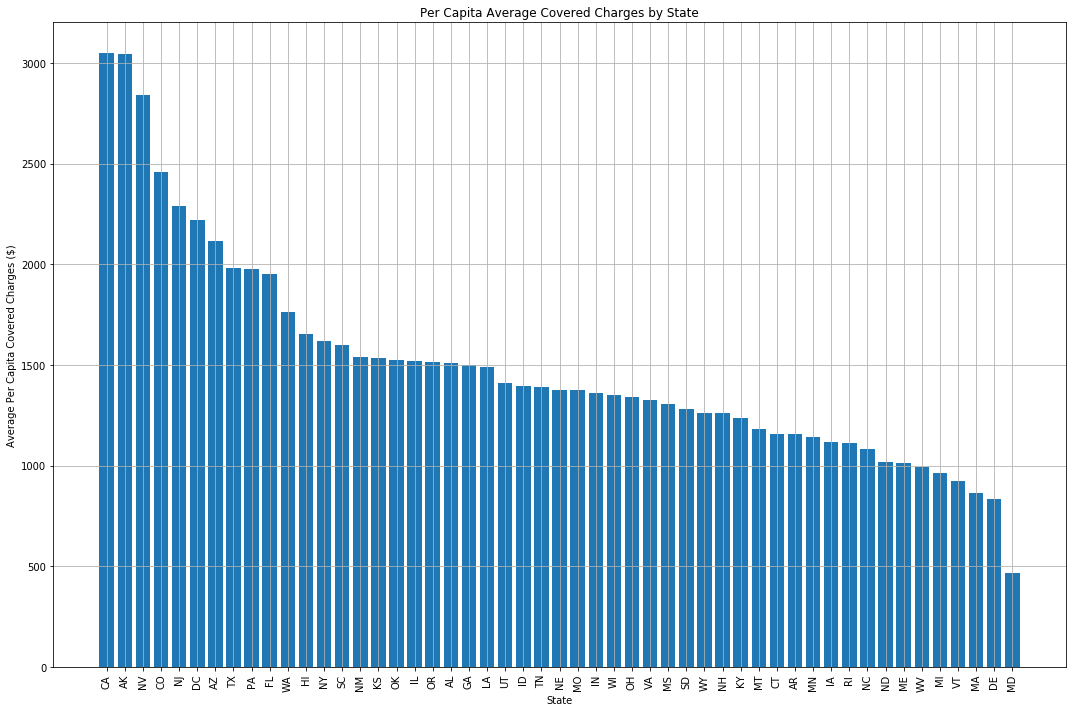

In [757]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(average_covered_charges["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, average_covered_charges["per capita average covered charges"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Covered Charges ($)")
plt.title("Per Capita Average Covered Charges by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Covered Charges by State")

*Observation:
*For some reason Maryland has a relatively high total and medicare payments, but low on consumer payment and averge covered charge.

In [758]:
data_2017_raw.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88


In [759]:
market_share = data_2017_raw.groupby(["provider_state", "provider_name"]).sum()

In [760]:
market_share = market_share.reset_index()

In [761]:
market_share.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,AK,ALASKA NATIVE MEDICAL CENTER,924,2445600.12,727963.76,686213.68
1,AK,ALASKA REGIONAL HOSPITAL,1317,4425897.89,775992.01,649633.48
2,AK,BARTLETT REGIONAL HOSPITAL,238,401616.35,212352.76,198250.18
3,AK,CENTRAL PENINSULA GENERAL HOSPITAL,414,640567.78,288606.46,270462.71
4,AK,FAIRBANKS MEMORIAL HOSPITAL,541,984926.24,436002.53,400349.35


In [762]:
number_state_hospitals = []
provider_state_count = market_share["provider_state"][0]
state_abbrevs = [provider_state_count]
x = 1
provider_name_count = 0

for row in market_share["provider_state"]:
    if row == provider_state_count:
        provider_state_count = row
        provider_name_count += 1
        
    else:
        number_state_hospitals.append(provider_name_count)
        provider_state_count = row
        provider_name_count = 1
        state_abbrevs.append(row)
number_state_hospitals.append(provider_name_count)
state_abbrevs.append(row)

In [763]:
number_state_hospitals = zip(state_abbrevs, number_state_hospitals)

In [764]:
number_state_hospitals = pd.DataFrame(number_state_hospitals)

In [765]:
number_state_hospitals = number_state_hospitals.rename(columns = ({0: "provider_state", 1: "number_of_hospitals"}))

In [766]:
number_state_hospitals.head()

,provider_state,number_of_hospitals
0,AK,8
1,AL,82
2,AR,44
3,AZ,59
4,CA,288


In [767]:
market_share = market_share.groupby("provider_state").sum().reset_index()

In [768]:
market_share.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08


In [769]:
market_share = market_share[["provider_state", "total_discharges", "average_total_payments"]]

In [770]:
market_share = pd.merge(state_total_payments_grouped, market_share, on="provider_state")

In [771]:
market_share = pd.merge(market_share, number_state_hospitals, on="provider_state")

In [772]:
market_share.head()

,provider_state,per_capita_average_total_payments,total_discharges,average_total_payments,number_of_hospitals
0,AK,742.757479,7681,5.705120e+06,8
1,HI,629.444775,13742,8.649830e+06,12
2,DC,569.416996,27599,1.571534e+07,7
3,CA,527.639260,531134,2.802472e+08,288
4,OR,526.075845,53440,2.811349e+07,34


In [773]:
market_share = market_share.sort_values("number_of_hospitals", ascending=False)

In [774]:
market_share.head()

,provider_state,per_capita_average_total_payments,total_discharges,average_total_payments,number_of_hospitals
3,CA,527.639260,531134,2.802472e+08,288
29,TX,355.205014,499356,1.773738e+08,279
46,FL,302.967838,582437,1.764597e+08,166
18,PA,391.829753,324956,1.273274e+08,148
9,NY,443.239158,428911,1.901102e+08,145


In [775]:
market_share["total_discharges_per_hospital"] = market_share["total_discharges"]/market_share["number_of_hospitals"]

In [776]:
market_share_discharges = market_share.sort_values("total_discharges_per_hospital", ascending=False)

In [777]:
market_share_discharges  = market_share_discharges [["provider_state", "total_discharges_per_hospital", "per_capita_average_total_payments"]]

In [778]:
market_share_discharges.head()

,provider_state,total_discharges_per_hospital,per_capita_average_total_payments
48,DE,5910.000000,293.054141
27,MA,4030.250000,363.988061
11,MD,3948.148936,429.937762
2,DC,3942.714286,569.416996
23,NJ,3890.640625,375.711545


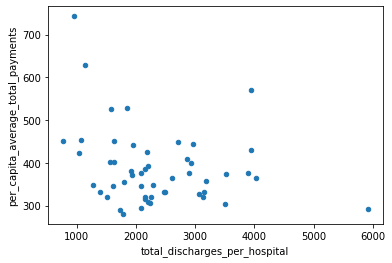

In [779]:
market_share_discharges.plot.scatter("total_discharges_per_hospital", "per_capita_average_total_payments")

In [780]:
x = market_share_discharges[["total_discharges_per_hospital", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,total_discharges_per_hospital,per_capita_average_total_payments
total_discharges_per_hospital,1.000000,-0.264992
per_capita_average_total_payments,-0.264992,1.000000


In [781]:
market_share_discharges = pd.merge(market_share_discharges, state_consumer_payment_grouped, on="provider_state")

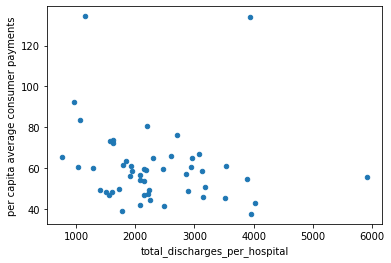

In [782]:
market_share_discharges.plot.scatter("total_discharges_per_hospital", "per capita average consumer payments")

In [783]:
x = market_share_discharges[["total_discharges_per_hospital", "per capita average consumer payments"]]
corr = x.corr()
corr

,total_discharges_per_hospital,per capita average consumer payments
total_discharges_per_hospital,1.000000,-0.146403
per capita average consumer payments,-0.146403,1.000000


In [784]:
covered_charge = pd.merge(state_consumer_payment_grouped, average_covered_charges, on="provider_state")

In [785]:
covered_charge.head()

,provider_state,per capita average consumer payments,per capita average covered charges
0,HI,134.346081,1654.204170
1,DC,134.141889,2217.923143
2,AK,92.287341,3043.830371
3,UT,83.676189,1411.642478
4,PA,80.520042,1976.144690


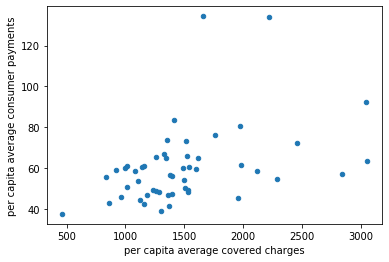

In [786]:
covered_charge.plot.scatter("per capita average covered charges", "per capita average consumer payments")

In [787]:
x = covered_charge[["per capita average covered charges", "per capita average consumer payments"]]
corr = x.corr()
corr

,per capita average covered charges,per capita average consumer payments
per capita average covered charges,1.000000,0.411455
per capita average consumer payments,0.411455,1.000000


In [788]:
physician_data.head()

,State,primary_care_physicians,specialist_physicians,total,provider_state
0,Alabama,5863.0,6342.0,12205.0,AL
1,Alaska,1054.0,846.0,1900.0,AK
2,Arizona,8537.0,9269.0,17806.0,AZ
3,Arkansas,3513.0,3637.0,7150.0,AR
4,California,54135.0,58771.0,112906.0,CA


In [789]:
data_grouped = data_2017_raw.groupby("provider_state").sum()

In [790]:
physician_number_raw = pd.merge(data_grouped, physician_data, on="provider_state")

In [791]:
physician_number_raw = pd.merge(physician_number_raw, state_total_payments_grouped, on="provider_state")

In [792]:
physician_number_raw.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,primary_care_physicians,specialist_physicians,total,per_capita_average_total_payments
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,1054.0,846.0,1900.0,742.757479
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,5863.0,6342.0,12205.0,289.991599
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,3513.0,3637.0,7150.0,295.446526
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,8537.0,9269.0,17806.0,440.873251
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,54135.0,58771.0,112906.0,527.639260


In [793]:
# physician_number = pd.merge(states_total_payments_grouped, physician_number, on="provider_state")

In [794]:
physician_number_raw.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,primary_care_physicians,specialist_physicians,total,per_capita_average_total_payments
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,1054.0,846.0,1900.0,742.757479
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,5863.0,6342.0,12205.0,289.991599
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,3513.0,3637.0,7150.0,295.446526
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,8537.0,9269.0,17806.0,440.873251
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,54135.0,58771.0,112906.0,527.639260


In [795]:
physician_number_raw["per_capita_specialist_physicians"] = physician_number_raw["total_discharges"]/physician_number_raw["specialist_physicians"]
physician_number_raw["per_capita_total_physicians"] = physician_number_raw["total_discharges"]/physician_number_raw["total"]
physician_number_raw["per_capita_primary_care_physicians"] = physician_number_raw["total_discharges"]/physician_number_raw["primary_care_physicians"]

In [796]:
physician_number_raw = physician_number_raw.sort_values("per_capita_primary_care_physicians", ascending=False)

In [797]:
physician_number_raw = physician_number_raw.sort_values("per_capita_total_physicians", ascending=False)

In [798]:
physician_number = physician_number_raw[["provider_state", "per_capita_average_total_payments", "total"]]

In [799]:
physician_number.head()

,provider_state,per_capita_average_total_payments,total
25,MS,280.663056,6597.0
41,SD,345.033019,2041.0
2,AR,295.446526,7150.0
17,KY,305.303638,11937.0
1,AL,289.991599,12205.0


In [800]:
physician_specialist = physician_number_raw[["provider_state", "per_capita_average_total_payments", "per_capita_specialist_physicians"]]

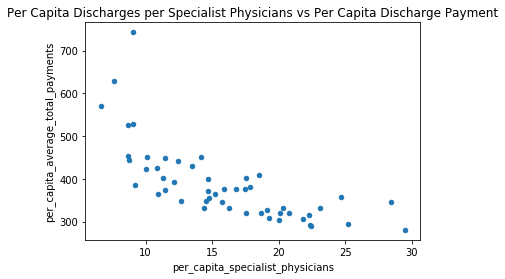

In [846]:
physician_specialist.plot.scatter("per_capita_specialist_physicians", "per_capita_average_total_payments")
plt.title("Per Capita Discharges per Specialist Physicians vs Per Capita Discharge Payment")
# plt.savefig("Per Capita Discharges per Specialist Physicians vs Per Capita Discharge Payment")

In [802]:
x = physician_number_raw[["per_capita_specialist_physicians", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,per_capita_specialist_physicians,per_capita_average_total_payments
per_capita_specialist_physicians,1.000000,-0.718889
per_capita_average_total_payments,-0.718889,1.000000


In [803]:
physician_total = physician_number_raw[["provider_state", "per_capita_average_total_payments", "per_capita_total_physicians"]]

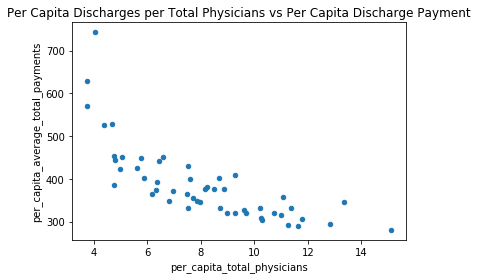

In [845]:
physician_total.plot.scatter("per_capita_total_physicians", "per_capita_average_total_payments")
plt.title("Per Capita Discharges per Total Physicians vs Per Capita Discharge Payment")
# plt.savefig("Per Capita Discharges per Total Physicians vs Per Capita Discharge Payment")

In [805]:
x = physician_number_raw[["per_capita_total_physicians", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,per_capita_total_physicians,per_capita_average_total_payments
per_capita_total_physicians,1.000000,-0.763735
per_capita_average_total_payments,-0.763735,1.000000


In [806]:
physician_primary_care = physician_number_raw[["provider_state", "per_capita_average_total_payments", "per_capita_primary_care_physicians"]]

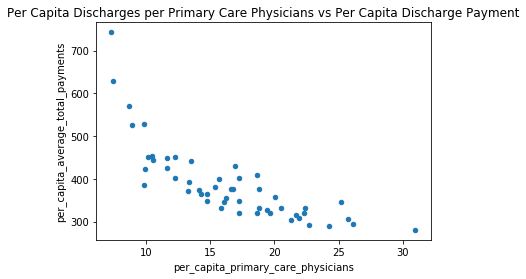

In [844]:
physician_primary_care.plot.scatter("per_capita_primary_care_physicians", "per_capita_average_total_payments")
plt.title("Per Capita Discharges per Primary Care Physicians vs Per Capita Discharge Payment")
# plt.savefig("Per Capita Discharges per Primary Care Physicians vs Per Capita Discharge Payment")

In [848]:
x = physician_number_raw[["per_capita_primary_care_physicians", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,per_capita_primary_care_physicians,per_capita_average_total_payments
per_capita_primary_care_physicians,1.000000,-0.789878
per_capita_average_total_payments,-0.789878,1.000000


In [809]:
nurse_data = pd.merge(data_grouped, nurse_data, on="provider_state")

In [810]:
nurse_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,total_nurses
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,480.0
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,2537.0
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,1305.0
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,3403.0
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,15414.0


In [811]:
nurse_data["per_capita_discharges_per_nurse"] = nurse_data["total_discharges"]/nurse_data["total_nurses"]

In [812]:
nurse_data["per_capita_payment_per_discharge"] = nurse_data["average_total_payments"]/nurse_data["total_discharges"]

In [813]:
nurse_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,total_nurses,per_capita_discharges_per_nurse,per_capita_payment_per_discharge
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,480.0,16.002083,742.757479
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,2537.0,55.995270,289.991599
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,1305.0,70.233716,295.446526
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,3403.0,33.805172,440.873251
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,15414.0,34.457895,527.639260


In [814]:
nurse_data = nurse_data.sort_values("per_capita_discharges_per_nurse", ascending=False)

In [834]:
nurse_data.head()

,per_capita_discharges_per_nurse,per_capita_payment_per_discharge
36,95.148541,332.274573
7,76.877437,569.416996
2,70.233716,295.446526
33,67.952438,408.344347
8,67.931034,293.054141


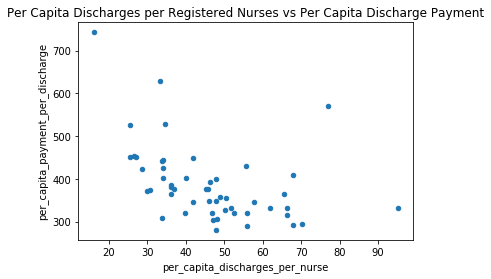

In [843]:
nurse_data.plot.scatter("per_capita_discharges_per_nurse", "per_capita_payment_per_discharge")
plt.title("Per Capita Discharges per Registered Nurses vs Per Capita Discharge Payment")
# plt.savefig("Per Capita Discharges per Registered Nurses vs Per Capita Discharge Payment")

In [817]:
nurse_data = nurse_data[["per_capita_discharges_per_nurse", "per_capita_payment_per_discharge"]]
nurse_data.corr()

,per_capita_discharges_per_nurse,per_capita_payment_per_discharge
per_capita_discharges_per_nurse,1.000000,-0.453863
per_capita_payment_per_discharge,-0.453863,1.000000


In [822]:
pa_results = pd.merge(data_grouped, pa_data, on="provider_state")

In [823]:
pa_results.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,pa_total
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,346.0
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,535.0
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,209.0
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,1940.0
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,7917.0


In [825]:
pa_results["per_capita_payment_per_discharge"] = pa_results["average_total_payments"]/pa_results["total_discharges"]

In [826]:
pa_results.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,pa_total,per_capita_payment_per_discharge
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,346.0,742.757479
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,535.0,289.991599
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,209.0,295.446526
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,1940.0,440.873251
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,7917.0,527.639260


In [827]:
pa_results = pa_results.sort_values("pa_total", ascending=False)

In [833]:
pa_results.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,pa_total,per_capita_payment_per_discharge
34,NY,428911,6.934001e+08,1.901102e+08,1.622839e+08,New York,8893.0,443.239158
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,7917.0,527.639260
9,FL,582437,1.137604e+09,1.764597e+08,1.500737e+08,Florida,6093.0,302.967838
43,TX,499356,9.899876e+08,1.773738e+08,1.467447e+08,Texas,5843.0,355.205014
38,PA,324956,6.421601e+08,1.273274e+08,1.011620e+08,Pennsylvania,5669.0,391.829753


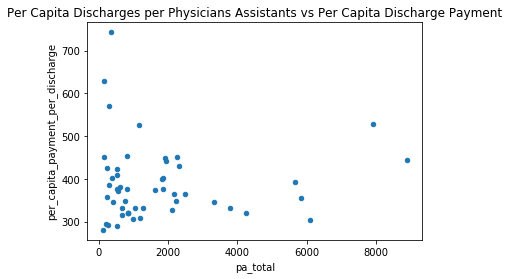

In [847]:
pa_results.plot.scatter("pa_total", "per_capita_payment_per_discharge")
plt.title("Per Capita Discharges per Physicians Assistants vs Per Capita Discharge Payment")
# plt.savefig("Per Capita Discharges per Physicians Assistants vs Per Capita Discharge Payment")

In [831]:
corr = pa_results[["pa_total", "per_capita_payment_per_discharge"]]
corr.corr()

,pa_total,per_capita_payment_per_discharge
pa_total,1.000000,0.018953
per_capita_payment_per_discharge,0.018953,1.000000
